In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle

In [2]:
# 1. Impor Data dan Informasi Dataset
df = pd.read_excel('fruit.xlsx')
print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  10000 non-null  float64
 1   weight    10000 non-null  float64
 2   red       10000 non-null  int64  
 3   green     10000 non-null  int64  
 4   blue      10000 non-null  int64  
 5   name      10000 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB
None


In [3]:
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   diameter  weight  red  green  blue    name
0      2.96   86.76  172     85     2  orange
1      3.91   88.05  166     78     3  orange
2      4.42   95.17  156     81     2  orange
3      4.47   95.60  163     81     4  orange
4      4.48   95.76  161     72     9  orange


In [4]:
# 2. Deskripsi Data
print("\nDataset Description:")
print(df.describe())


Dataset Description:
           diameter        weight           red         green          blue
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000
mean       9.975685    175.050792    153.847800     76.010600     11.363200
std        1.947844     29.212119     10.432954     11.708433      9.061275
min        2.960000     86.760000    115.000000     31.000000      2.000000
25%        8.460000    152.220000    147.000000     68.000000      2.000000
50%        9.980000    174.985000    154.000000     76.000000     10.000000
75%       11.480000    197.722500    161.000000     84.000000     17.000000
max       16.450000    261.510000    192.000000    116.000000     56.000000


In [5]:
# 3. Encoding Kategorikal (jika ada)
label_encoder = LabelEncoder()
if df.select_dtypes(include=['object']).shape[1] > 0:
    # Mencari kolom kategorikal dan melakukan encoding
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = label_encoder.fit_transform(df[col])

In [6]:

# 4. Scaling Data (menyusun fitur dan target)
X = df.drop('name', axis=1)  # Asumsikan 'label' adalah kolom target
y = df['name']

In [7]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# 5. Membagi Data untuk Pelatihan dan Pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# 6. Melatih Model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
# 7. Evaluasi Model (Akurasi)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy * 100:.2f}%")



Akurasi Model: 94.15%


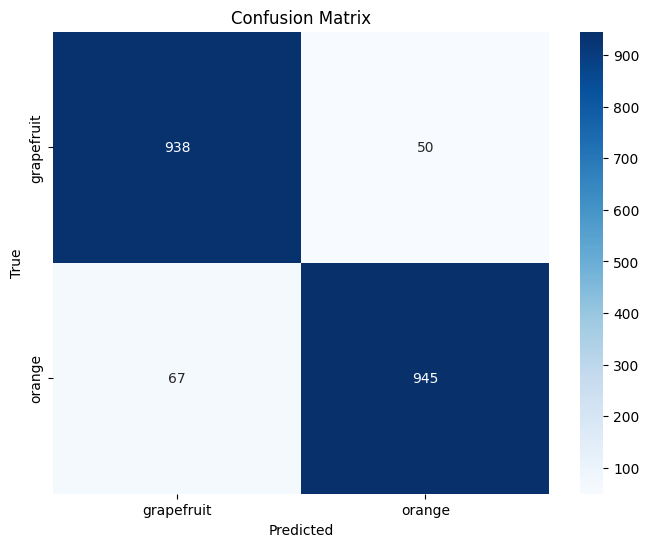

In [11]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [12]:
# 8. Menyimpan Model dengan Pickle
with open('Logistic_Regression_fruit_model.pkl', 'wb') as file:
    pickle.dump(model, file)
    pickle.dump(scaler, file)
with open('LabelEncoder_fruit.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)



In [13]:
# 9. Pengetesan dengan Data Baru (contoh data)
new_data = np.array([[5.5, 150, 0.8, 0.5, 0.9]])  # Misalkan ada 4 fitur
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)

c:\Users\ypray\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [14]:
# Output hasil prediksi
predicted_label = label_encoder.inverse_transform(prediction)
print("\nPrediksi untuk data baru:", predicted_label)


Prediksi untuk data baru: ['orange']
